<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.set_style("whitegrid", {'axes.grid' : False})

from tqdm.auto import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [5]:
from pytorch_metric_learning import losses, miners, distances, reducers, samplers
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch.nn as nn
import random

In [6]:
from code.dataloader import AgeGroupMLDataset, AgeGroupClfDataset
from code.encoder_gru import Encoder
from code.decoder import Decoder
from code.classifier import Classifier
from code.utils import train_ml_model, train_classifier

In [7]:
BATCH_SIZE = 64 # BATCH_SIZE unique persons
NUM_OF_SUBSEQUENCES = 5
SUBSEQUENCE_LENGTH = 90

EMBEDDING_DIM = 256
LR = 0.002
NUM_EPOCHS = 50

cat_vocab_sizes = [204]
cat_embedding_dim = 102
num_input_dim = 4
NUM_OBS = 30000

In [8]:
arches = (
    ('GRU', nn.GRU(
                num_input_dim + cat_embedding_dim,
                EMBEDDING_DIM,
                batch_first=False),
    ),
    ('LSTM', nn.LSTM(
                num_input_dim + cat_embedding_dim,
                EMBEDDING_DIM,
                batch_first=False),
    ),
)

In [9]:
dataset = AgeGroupMLDataset(num_observations=NUM_OBS)

In [10]:
dataset.load_client_to_indices()

In [11]:
clfdataset = AgeGroupClfDataset()

In [12]:
clfdataset.load_client_to_indices()

In [13]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [14]:
targets = dataset.targets

dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE,
    num_workers=0,
)

targets = clfdataset.targets

train_idx, test_idx= train_test_split(
    np.arange(len(targets)),
    test_size=0.3,
    shuffle=True,
    stratify=targets,
    random_state=228
)

train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
test_sampler = torch.utils.data.SubsetRandomSampler(test_idx)

trainloader = torch.utils.data.DataLoader(
    clfdataset, batch_size=BATCH_SIZE,
    sampler=train_sampler)
testloader = torch.utils.data.DataLoader(
    clfdataset, batch_size=BATCH_SIZE,
    sampler=test_sampler)

GRU


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.1774277538061142
Epoch 1 Loss = 0.15045054256916046
Epoch 2 Loss = 0.14610807597637177
Epoch 3 Loss = 0.14446628093719482
Epoch 4 Loss = 0.1435842514038086
Epoch 5 Loss = 0.14240461587905884
Epoch 6 Loss = 0.14155416190624237
Epoch 7 Loss = 0.1409432739019394
Epoch 8 Loss = 0.14067737758159637
Epoch 9 Loss = 0.14008945226669312
Epoch 10 Loss = 0.13999725878238678
Epoch 11 Loss = 0.1394166201353073
Epoch 12 Loss = 0.13902074098587036
Epoch 13 Loss = 0.1387517750263214
Epoch 14 Loss = 0.1384231448173523
Epoch 15 Loss = 0.13864725828170776
Epoch 16 Loss = 0.1379423588514328
Epoch 17 Loss = 0.13777931034564972
Epoch 18 Loss = 0.13726982474327087
Epoch 19 Loss = 0.13764947652816772
Epoch 20 Loss = 0.1373233199119568
Epoch 21 Loss = 0.13709452748298645
Epoch 22 Loss = 0.13678616285324097
Epoch 23 Loss = 0.13675105571746826
Epoch 24 Loss = 0.1366395503282547
Epoch 25 Loss = 0.1362445205450058
Epoch 26 Loss = 0.13632424175739288
Epoch 27 Loss = 0.13645106554031372
Epoch 28 Los

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5335714221000671, val acc: 0.5613333582878113
train loss: 1.036687970161438; val loss: 0.9786823987960815
Epoch 1, train acc: 0.5496190190315247, val acc: 0.5616666674613953
train loss: 1.002182126045227; val loss: 0.9818558692932129
Epoch 2, train acc: 0.5547618865966797, val acc: 0.5568888783454895
train loss: 0.9950386881828308; val loss: 0.9813334345817566
Epoch 3, train acc: 0.5532380938529968, val acc: 0.566444456577301
train loss: 0.9909645915031433; val loss: 0.9724193811416626
Epoch 4, train acc: 0.5566666722297668, val acc: 0.5565555691719055
train loss: 0.9871914386749268; val loss: 0.976057231426239
Epoch 5, train acc: 0.553761899471283, val acc: 0.5666666626930237
train loss: 0.9927091002464294; val loss: 0.974960446357727
Epoch 6, train acc: 0.5557143092155457, val acc: 0.5624444484710693
train loss: 0.9873331785202026; val loss: 0.9696494936943054
Epoch 7, train acc: 0.5566666722297668, val acc: 0.5648888945579529
train loss: 0.9856650829315186; val

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.19487710297107697
Epoch 1 Loss = 0.16057048738002777
Epoch 2 Loss = 0.1509132832288742
Epoch 3 Loss = 0.1472797840833664
Epoch 4 Loss = 0.14545628428459167
Epoch 5 Loss = 0.14432203769683838
Epoch 6 Loss = 0.14358286559581757
Epoch 7 Loss = 0.1427530199289322
Epoch 8 Loss = 0.14208565652370453
Epoch 9 Loss = 0.14151190221309662
Epoch 10 Loss = 0.14081552624702454
Epoch 11 Loss = 0.1406540423631668
Epoch 12 Loss = 0.13995957374572754
Epoch 13 Loss = 0.13973523676395416
Epoch 14 Loss = 0.13935953378677368
Epoch 15 Loss = 0.13906125724315643
Epoch 16 Loss = 0.1386885643005371
Epoch 17 Loss = 0.138264998793602
Epoch 18 Loss = 0.13798505067825317
Epoch 19 Loss = 0.13781097531318665
Epoch 20 Loss = 0.1376095563173294
Epoch 21 Loss = 0.13741721212863922
Epoch 22 Loss = 0.13722029328346252
Epoch 23 Loss = 0.13709619641304016
Epoch 24 Loss = 0.13703709840774536
Epoch 25 Loss = 0.13658089935779572
Epoch 26 Loss = 0.13628007471561432
Epoch 27 Loss = 0.13641305267810822
Epoch 28 L

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5317142605781555, val acc: 0.5497778058052063
train loss: 1.0491694211959839; val loss: 0.9952775835990906
Epoch 1, train acc: 0.5486190319061279, val acc: 0.5542222261428833
train loss: 1.0058704614639282; val loss: 0.9874555468559265
Epoch 2, train acc: 0.555809497833252, val acc: 0.5516666769981384
train loss: 0.9956584572792053; val loss: 0.9814152121543884
Epoch 3, train acc: 0.5492380857467651, val acc: 0.5628889203071594
train loss: 0.9964016079902649; val loss: 0.9822368025779724
Epoch 4, train acc: 0.5511904954910278, val acc: 0.5468888878822327
train loss: 0.9895599484443665; val loss: 0.988361120223999
Epoch 5, train acc: 0.5535237789154053, val acc: 0.562666654586792
train loss: 0.9934682846069336; val loss: 0.9774664640426636
Epoch 6, train acc: 0.5569523572921753, val acc: 0.5624444484710693
train loss: 0.9890902638435364; val loss: 0.967258632183075
Epoch 7, train acc: 0.5564761757850647, val acc: 0.5535555481910706
train loss: 0.9883294701576233; v

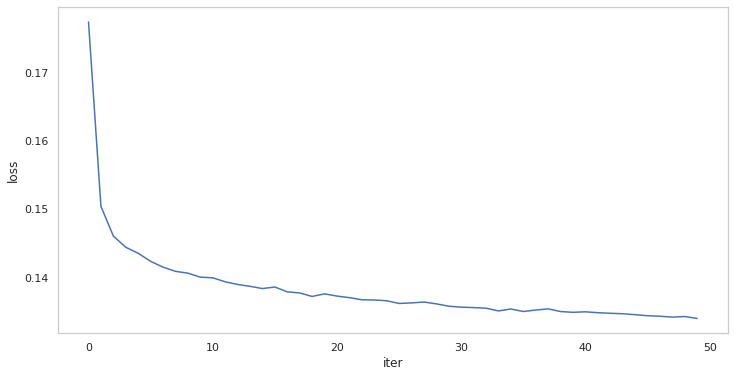

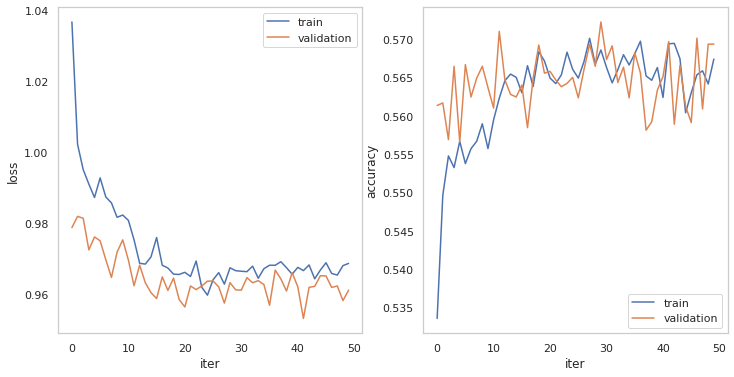

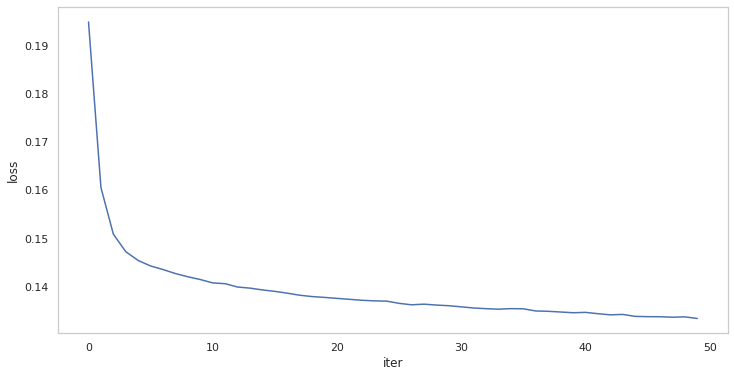

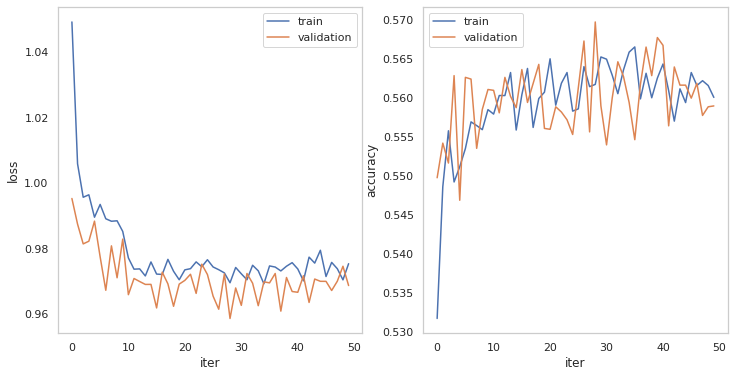

In [15]:
for (arch, cell) in tqdm(arches):
    print(arch)
    LR = 0.002
    
    # train decoder
    
    encoder = Encoder(
        numerical_input_dim=num_input_dim,
        cat_vocab_sizes=cat_vocab_sizes,
        cat_embedding_dim=cat_embedding_dim,
        embedding_dim=EMBEDDING_DIM,
    )
    encoder.sequence_encoder = cell
    encoder.to(device);
    optimizer = optim.Adam(encoder.parameters(), lr=LR)
    
    distance = distances.CosineSimilarity()
    reducer = reducers.ThresholdReducer(low = 0) # basically, returns average
    loss_func = losses.TripletMarginLoss(margin = 0.4, distance = distance, reducer = reducer)
    mining_func = miners.TripletMarginMiner(margin = 0.4, distance = distance, type_of_triplets = "semihard")
    
    train_losses = train_ml_model(
        encoder, NUM_EPOCHS, dataloader, NUM_OF_SUBSEQUENCES,
        mining_func, loss_func, optimizer)
    fig, axs = plt.subplots(figsize=(12, 6))

    plt.plot(train_losses, label='train')
    plt.xlabel('iter')
    plt.ylabel('loss');
    plt.savefig(f'plots/ML_{arch}_{EMBEDDING_DIM}_{NUM_OBS}_{NUM_EPOCHS}.png')
    
    SCHEDULER_EPOCHS = 2
    LR = 0.002
    
    # train classifier decoder
    
    classifier = Classifier(
        numerical_input_dim=num_input_dim,
        cat_vocab_sizes=cat_vocab_sizes,
        cat_embedding_dim=cat_embedding_dim,
        embedding_dim=EMBEDDING_DIM
    )
    classifier.encoder = encoder
    classifier.freeze_encoder()
    classifier.to(device);
    
    optimizer = optim.Adam(classifier.decoder.parameters(), lr=LR)
    criterion = nn.CrossEntropyLoss()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        patience=SCHEDULER_EPOCHS,
    )
    
    train_losses, train_accuracy, val_losses, val_accuracy = train_classifier(
        classifier, NUM_EPOCHS, trainloader, testloader,
        optimizer, criterion, scheduler,
        enable_train_mode = lambda: classifier.decoder.train(),
        enable_test_mode = lambda: classifier.decoder.eval(),
    )
    
    fig, axs = plt.subplots(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='train')
    plt.plot(val_losses, label='validation')
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('iter')
    plt.ylabel('accuracy');
    plt.plot(train_accuracy, label='train')
    plt.plot(val_accuracy, label='validation')
    plt.legend()

    plt.savefig(f'plots/clfdec_{arch}_{EMBEDDING_DIM}_{NUM_OBS}_{NUM_EPOCHS}.png')

In [24]:
import gc
gc.collect()
torch.cuda.empty_cache() 

32


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.1860627382993698
Epoch 1 Loss = 0.1564205139875412
Epoch 2 Loss = 0.1512417495250702
Epoch 3 Loss = 0.14869560301303864
Epoch 4 Loss = 0.147853821516037
Epoch 5 Loss = 0.14747294783592224
Epoch 6 Loss = 0.14677782356739044
Epoch 7 Loss = 0.14651915431022644
Epoch 8 Loss = 0.1460353285074234
Epoch 9 Loss = 0.14572228491306305
Epoch 10 Loss = 0.14558234810829163
Epoch 11 Loss = 0.14521396160125732
Epoch 12 Loss = 0.14503957331180573
Epoch 13 Loss = 0.1449538618326187
Epoch 14 Loss = 0.14481814205646515
Epoch 15 Loss = 0.14468811452388763
Epoch 16 Loss = 0.144570991396904
Epoch 17 Loss = 0.1445322036743164
Epoch 18 Loss = 0.14452119171619415
Epoch 19 Loss = 0.14429694414138794
Epoch 20 Loss = 0.14443683624267578
Epoch 21 Loss = 0.14417916536331177
Epoch 22 Loss = 0.14406047761440277
Epoch 23 Loss = 0.14411959052085876
Epoch 24 Loss = 0.14387434720993042
Epoch 25 Loss = 0.14390522241592407
Epoch 26 Loss = 0.14402124285697937
Epoch 27 Loss = 0.1438591033220291
Epoch 28 Loss

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.516952395439148, val acc: 0.5422222018241882
train loss: 1.0729314088821411; val loss: 1.023330807685852
Epoch 1, train acc: 0.5282856822013855, val acc: 0.5342222452163696
train loss: 1.0386378765106201; val loss: 1.026018500328064
Epoch 2, train acc: 0.5351904630661011, val acc: 0.5458889007568359
train loss: 1.0282528400421143; val loss: 1.0132867097854614
Epoch 3, train acc: 0.529952347278595, val acc: 0.542555570602417
train loss: 1.0314581394195557; val loss: 1.014935851097107
Epoch 4, train acc: 0.5398571491241455, val acc: 0.5396666526794434
train loss: 1.0251857042312622; val loss: 1.0152720212936401
Epoch 5, train acc: 0.5390952229499817, val acc: 0.5407778024673462
train loss: 1.0238523483276367; val loss: 1.0096107721328735
Epoch 6, train acc: 0.5354285836219788, val acc: 0.5509999990463257
train loss: 1.0235967636108398; val loss: 1.0059256553649902
Epoch 7, train acc: 0.5400952100753784, val acc: 0.5472222566604614
train loss: 1.019902229309082; val 

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.17714431881904602
Epoch 1 Loss = 0.15341508388519287
Epoch 2 Loss = 0.1494569629430771
Epoch 3 Loss = 0.14734461903572083
Epoch 4 Loss = 0.14603285491466522
Epoch 5 Loss = 0.14551350474357605
Epoch 6 Loss = 0.14485198259353638
Epoch 7 Loss = 0.14452996850013733
Epoch 8 Loss = 0.14421404898166656
Epoch 9 Loss = 0.14388500154018402
Epoch 10 Loss = 0.14355428516864777
Epoch 11 Loss = 0.1434761881828308
Epoch 12 Loss = 0.14328338205814362
Epoch 13 Loss = 0.14300213754177094
Epoch 14 Loss = 0.14282850921154022
Epoch 15 Loss = 0.14242728054523468
Epoch 16 Loss = 0.14242510497570038
Epoch 17 Loss = 0.14232829213142395
Epoch 18 Loss = 0.14224515855312347
Epoch 19 Loss = 0.1420120745897293
Epoch 20 Loss = 0.14190050959587097
Epoch 21 Loss = 0.141692653298378
Epoch 22 Loss = 0.14146152138710022
Epoch 23 Loss = 0.1413431465625763
Epoch 24 Loss = 0.14123736321926117
Epoch 25 Loss = 0.1413952112197876
Epoch 26 Loss = 0.1411713808774948
Epoch 27 Loss = 0.14092771708965302
Epoch 28 L

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5177618861198425, val acc: 0.5413333177566528
train loss: 1.076747179031372; val loss: 1.0074372291564941
Epoch 1, train acc: 0.5383333563804626, val acc: 0.5460000038146973
train loss: 1.0236033201217651; val loss: 1.004658818244934
Epoch 2, train acc: 0.5405714511871338, val acc: 0.5429999828338623
train loss: 1.019945502281189; val loss: 1.0015767812728882
Epoch 3, train acc: 0.5448095202445984, val acc: 0.5551111102104187
train loss: 1.010561227798462; val loss: 0.9976314306259155
Epoch 4, train acc: 0.545714259147644, val acc: 0.5477777719497681
train loss: 1.0078967809677124; val loss: 0.9972622990608215
Epoch 5, train acc: 0.5529523491859436, val acc: 0.5517777800559998
train loss: 1.001647710800171; val loss: 0.9951167702674866
Epoch 6, train acc: 0.5475237965583801, val acc: 0.5517777800559998
train loss: 1.0022677183151245; val loss: 0.9946980476379395
Epoch 7, train acc: 0.5497142672538757, val acc: 0.5526666641235352
train loss: 1.0011247396469116; val

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.1791517436504364
Epoch 1 Loss = 0.15181121230125427
Epoch 2 Loss = 0.14753516018390656
Epoch 3 Loss = 0.14556647837162018
Epoch 4 Loss = 0.1444912701845169
Epoch 5 Loss = 0.14392369985580444
Epoch 6 Loss = 0.14320099353790283
Epoch 7 Loss = 0.142400324344635
Epoch 8 Loss = 0.14176218211650848
Epoch 9 Loss = 0.1416296660900116
Epoch 10 Loss = 0.1413184255361557
Epoch 11 Loss = 0.14101235568523407
Epoch 12 Loss = 0.14065143465995789
Epoch 13 Loss = 0.14092592895030975
Epoch 14 Loss = 0.1400042474269867
Epoch 15 Loss = 0.13996462523937225
Epoch 16 Loss = 0.14001677930355072
Epoch 17 Loss = 0.13961124420166016
Epoch 18 Loss = 0.1394532024860382
Epoch 19 Loss = 0.13933096826076508
Epoch 20 Loss = 0.13918253779411316
Epoch 21 Loss = 0.13896118104457855
Epoch 22 Loss = 0.13884486258029938
Epoch 23 Loss = 0.13852570950984955
Epoch 24 Loss = 0.13836799561977386
Epoch 25 Loss = 0.138313427567482
Epoch 26 Loss = 0.13828016817569733
Epoch 27 Loss = 0.13808594644069672
Epoch 28 Los

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5288571119308472, val acc: 0.5528888702392578
train loss: 1.0682454109191895; val loss: 0.9988753795623779
Epoch 1, train acc: 0.5450952053070068, val acc: 0.5498889088630676
train loss: 1.0103168487548828; val loss: 0.9942296743392944
Epoch 2, train acc: 0.55009526014328, val acc: 0.5563333630561829
train loss: 1.0044965744018555; val loss: 0.9825937151908875
Epoch 3, train acc: 0.5469047427177429, val acc: 0.5509999990463257
train loss: 1.000716209411621; val loss: 0.9825130105018616
Epoch 4, train acc: 0.5491904616355896, val acc: 0.5493333339691162
train loss: 1.0016978979110718; val loss: 0.9962218999862671
Epoch 5, train acc: 0.551714301109314, val acc: 0.5551111102104187
train loss: 0.993956983089447; val loss: 0.9816538691520691
Epoch 6, train acc: 0.5543809533119202, val acc: 0.5591111183166504
train loss: 0.991723358631134; val loss: 0.9725954532623291
Epoch 7, train acc: 0.5515238046646118, val acc: 0.5597777962684631
train loss: 0.9905235171318054; val

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.17240269482135773
Epoch 1 Loss = 0.14966681599617004
Epoch 2 Loss = 0.14575983583927155
Epoch 3 Loss = 0.14411358535289764
Epoch 4 Loss = 0.14339996874332428
Epoch 5 Loss = 0.1419871300458908
Epoch 6 Loss = 0.14139266312122345
Epoch 7 Loss = 0.14082106947898865
Epoch 8 Loss = 0.1406150758266449
Epoch 9 Loss = 0.1399010419845581
Epoch 10 Loss = 0.13972674310207367
Epoch 11 Loss = 0.13913002610206604
Epoch 12 Loss = 0.13907390832901
Epoch 13 Loss = 0.1385558396577835
Epoch 14 Loss = 0.13829414546489716
Epoch 15 Loss = 0.13818944990634918
Epoch 16 Loss = 0.13804733753204346
Epoch 17 Loss = 0.13762560486793518
Epoch 18 Loss = 0.13747182488441467
Epoch 19 Loss = 0.1373482644557953
Epoch 20 Loss = 0.13745222985744476
Epoch 21 Loss = 0.13703136146068573
Epoch 22 Loss = 0.13691242039203644
Epoch 23 Loss = 0.13685643672943115
Epoch 24 Loss = 0.13619786500930786
Epoch 25 Loss = 0.13614466786384583
Epoch 26 Loss = 0.13631495833396912
Epoch 27 Loss = 0.13619904220104218
Epoch 28 L

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5126190185546875, val acc: 0.5538889169692993
train loss: 1.0684401988983154; val loss: 0.9884989857673645
Epoch 1, train acc: 0.5446666479110718, val acc: 0.5547778010368347
train loss: 1.006176471710205; val loss: 0.9870045781135559
Epoch 2, train acc: 0.549047589302063, val acc: 0.5596666932106018
train loss: 0.9998688101768494; val loss: 0.9753503203392029
Epoch 3, train acc: 0.5544285774230957, val acc: 0.5603333115577698
train loss: 0.9919167160987854; val loss: 0.9706960916519165
Epoch 4, train acc: 0.5539047718048096, val acc: 0.5605555772781372
train loss: 0.9899662137031555; val loss: 0.9689286947250366
Epoch 5, train acc: 0.553428590297699, val acc: 0.5580000281333923
train loss: 0.9924002885818481; val loss: 0.9748223423957825
Epoch 6, train acc: 0.5570476055145264, val acc: 0.5657777786254883
train loss: 0.9863733649253845; val loss: 0.9673981070518494
Epoch 7, train acc: 0.5531904697418213, val acc: 0.5614444613456726
train loss: 0.9902099967002869; 

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.1734454184770584
Epoch 1 Loss = 0.14860984683036804
Epoch 2 Loss = 0.1454567164182663
Epoch 3 Loss = 0.14353494346141815
Epoch 4 Loss = 0.14208011329174042
Epoch 5 Loss = 0.1414063721895218
Epoch 6 Loss = 0.14039410650730133
Epoch 7 Loss = 0.1399175524711609
Epoch 8 Loss = 0.13960324227809906
Epoch 9 Loss = 0.13891786336898804
Epoch 10 Loss = 0.1384279429912567
Epoch 11 Loss = 0.13810598850250244
Epoch 12 Loss = 0.13758109509944916
Epoch 13 Loss = 0.13726776838302612
Epoch 14 Loss = 0.13717664778232574
Epoch 15 Loss = 0.13686169683933258
Epoch 16 Loss = 0.1367960274219513
Epoch 17 Loss = 0.13624881207942963
Epoch 18 Loss = 0.13622069358825684
Epoch 19 Loss = 0.1357140988111496
Epoch 20 Loss = 0.1355578452348709
Epoch 21 Loss = 0.13535265624523163
Epoch 22 Loss = 0.13553676009178162
Epoch 23 Loss = 0.13511987030506134
Epoch 24 Loss = 0.13488608598709106
Epoch 25 Loss = 0.13464383780956268
Epoch 26 Loss = 0.13470329344272614
Epoch 27 Loss = 0.13461965322494507
Epoch 28 L

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5323809385299683, val acc: 0.5555555820465088
train loss: 1.038507103919983; val loss: 0.9836908578872681
Epoch 1, train acc: 0.5480476021766663, val acc: 0.5472222566604614
train loss: 0.9970554709434509; val loss: 0.9841604232788086
Epoch 2, train acc: 0.5554285645484924, val acc: 0.5625555515289307
train loss: 0.9897127151489258; val loss: 0.9686717391014099
Epoch 3, train acc: 0.5612857341766357, val acc: 0.5594444274902344
train loss: 0.9786649942398071; val loss: 0.9646607637405396
Epoch 4, train acc: 0.5569523572921753, val acc: 0.5614444613456726
train loss: 0.9812495708465576; val loss: 0.9675987958908081
Epoch 5, train acc: 0.5621428489685059, val acc: 0.5572222471237183
train loss: 0.9819427132606506; val loss: 0.9739224314689636
Epoch 6, train acc: 0.5573333501815796, val acc: 0.5556666851043701
train loss: 0.9801350831985474; val loss: 0.9764021039009094
Epoch 7, train acc: 0.5626190304756165, val acc: 0.5651111006736755
train loss: 0.97344970703125; 

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.17455428838729858
Epoch 1 Loss = 0.14828793704509735
Epoch 2 Loss = 0.144695445895195
Epoch 3 Loss = 0.14268454909324646
Epoch 4 Loss = 0.14136548340320587
Epoch 5 Loss = 0.14055316150188446
Epoch 6 Loss = 0.1395690143108368
Epoch 7 Loss = 0.1391199231147766
Epoch 8 Loss = 0.1387593001127243
Epoch 9 Loss = 0.13843858242034912
Epoch 10 Loss = 0.13839395344257355
Epoch 11 Loss = 0.13729606568813324
Epoch 12 Loss = 0.13711945712566376
Epoch 13 Loss = 0.13681559264659882
Epoch 14 Loss = 0.1365550011396408
Epoch 15 Loss = 0.13604287803173065
Epoch 16 Loss = 0.13603956997394562
Epoch 17 Loss = 0.1356363147497177
Epoch 18 Loss = 0.13535332679748535
Epoch 19 Loss = 0.13497087359428406
Epoch 20 Loss = 0.13476184010505676
Epoch 21 Loss = 0.13445143401622772
Epoch 22 Loss = 0.13447816669940948
Epoch 23 Loss = 0.13419725000858307
Epoch 24 Loss = 0.13378016650676727
Epoch 25 Loss = 0.13342338800430298
Epoch 26 Loss = 0.1331273764371872
Epoch 27 Loss = 0.13274036347866058
Epoch 28 L

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.5403809547424316, val acc: 0.5608888864517212
train loss: 1.03486967086792; val loss: 0.9833378195762634
Epoch 1, train acc: 0.5617142915725708, val acc: 0.5609999895095825
train loss: 0.9870195388793945; val loss: 0.974966287612915
Epoch 2, train acc: 0.5622380971908569, val acc: 0.5693333148956299
train loss: 0.982521116733551; val loss: 0.9679930210113525
Epoch 3, train acc: 0.5627142786979675, val acc: 0.5635555386543274
train loss: 0.9801924228668213; val loss: 0.9627723693847656
Epoch 4, train acc: 0.5634762048721313, val acc: 0.5621111392974854
train loss: 0.9764504432678223; val loss: 0.9671076536178589
Epoch 5, train acc: 0.5647618770599365, val acc: 0.5641111135482788
train loss: 0.9706940054893494; val loss: 0.963195264339447
Epoch 6, train acc: 0.5657142996788025, val acc: 0.5704444646835327
train loss: 0.9672874808311462; val loss: 0.9593489766120911
Epoch 7, train acc: 0.5619523525238037, val acc: 0.5654444694519043
train loss: 0.9688494205474854; va

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Loss = 0.19129057228565216
Epoch 1 Loss = 0.15560555458068848
Epoch 2 Loss = 0.14755374193191528
Epoch 3 Loss = 0.14433735609054565
Epoch 4 Loss = 0.142795130610466
Epoch 5 Loss = 0.14140379428863525
Epoch 6 Loss = 0.14035265147686005
Epoch 7 Loss = 0.13987316191196442
Epoch 8 Loss = 0.13928985595703125
Epoch 9 Loss = 0.13924703001976013
Epoch 10 Loss = 0.13823150098323822
Epoch 11 Loss = 0.13778403401374817
Epoch 12 Loss = 0.1377509981393814
Epoch 13 Loss = 0.1371481865644455
Epoch 14 Loss = 0.1369650810956955
Epoch 15 Loss = 0.13680028915405273
Epoch 16 Loss = 0.13639385998249054
Epoch 17 Loss = 0.1359628438949585
Epoch 18 Loss = 0.1357564926147461
Epoch 19 Loss = 0.13552506268024445
Epoch 20 Loss = 0.135154590010643
Epoch 21 Loss = 0.13438457250595093
Epoch 22 Loss = 0.13472573459148407
Epoch 23 Loss = 0.13475912809371948
Epoch 24 Loss = 0.1347670704126358
Epoch 25 Loss = 0.1339167356491089
Epoch 26 Loss = 0.133478581905365
Epoch 27 Loss = 0.13309191167354584
Epoch 28 Loss =

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train acc: 0.40433332324028015, val acc: 0.39577779173851013
train loss: 1.2654751539230347; val loss: 1.2629212141036987
Epoch 1, train acc: 0.4314761757850647, val acc: 0.43166667222976685
train loss: 1.2186863422393799; val loss: 1.2109683752059937
Epoch 2, train acc: 0.433095246553421, val acc: 0.43933334946632385
train loss: 1.2083650827407837; val loss: 1.2124321460723877
Epoch 3, train acc: 0.43519046902656555, val acc: 0.4354444444179535
train loss: 1.2080790996551514; val loss: 1.2154258489608765
Epoch 4, train acc: 0.4396190345287323, val acc: 0.4354444444179535
train loss: 1.204749345779419; val loss: 1.2010833024978638
Epoch 5, train acc: 0.43447619676589966, val acc: 0.39322221279144287
train loss: 1.1995333433151245; val loss: 1.27595055103302
Epoch 6, train acc: 0.4420476257801056, val acc: 0.4305555522441864
train loss: 1.1984680891036987; val loss: 1.2037876844406128
Epoch 7, train acc: 0.43909522891044617, val acc: 0.43255555629730225
train loss: 1.1999329328

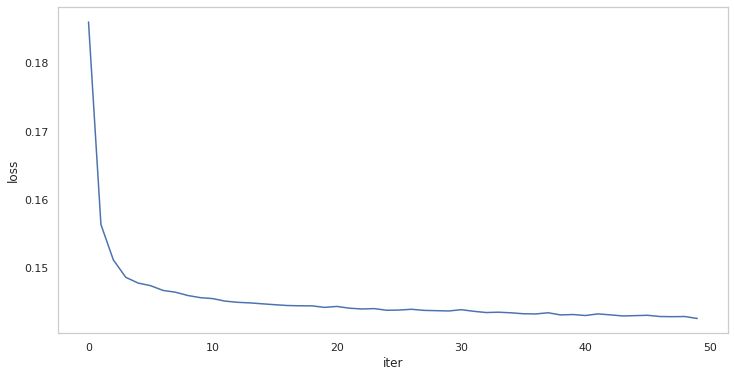

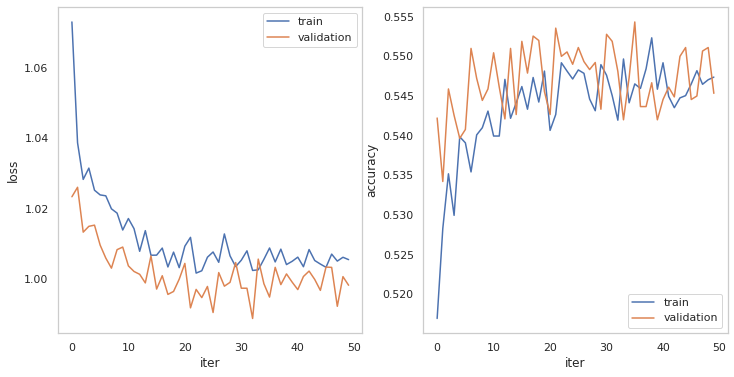

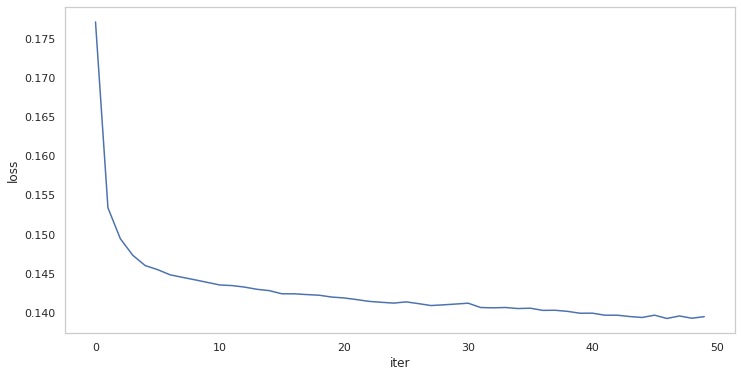

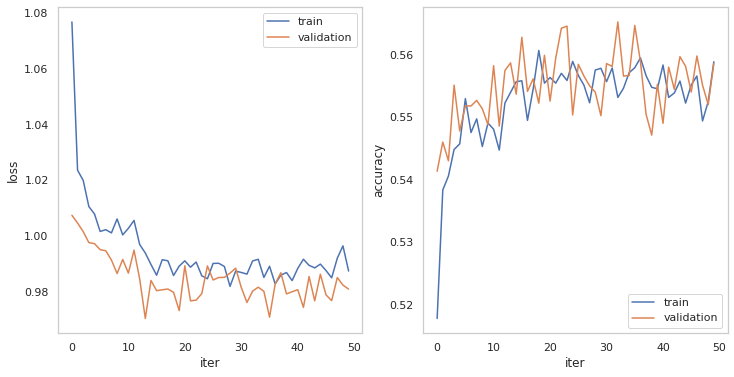

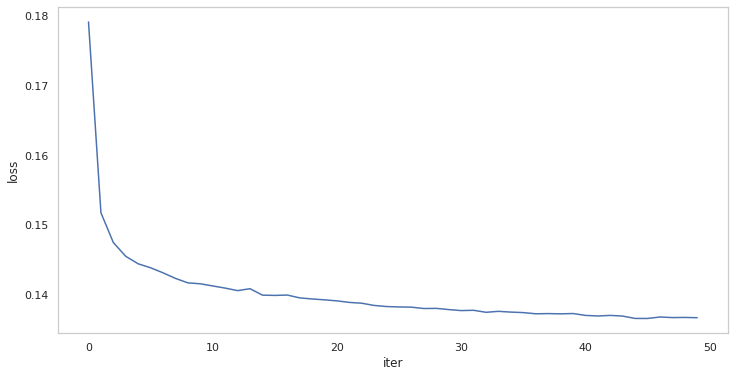

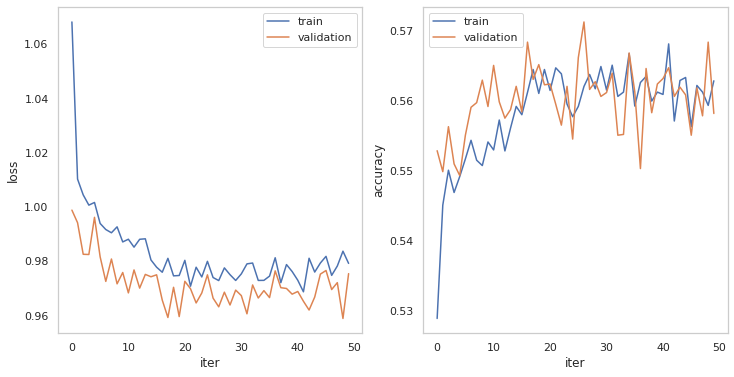

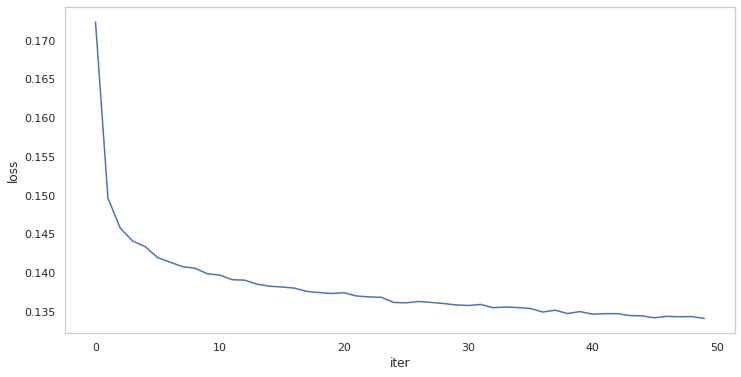

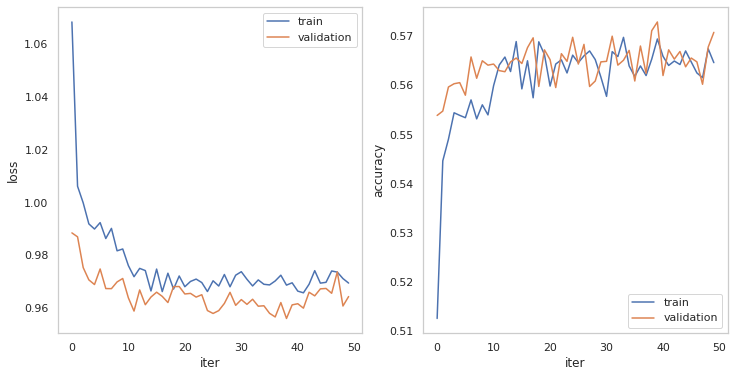

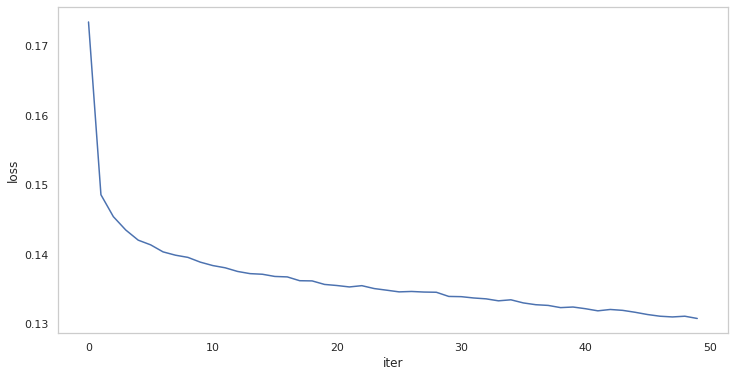

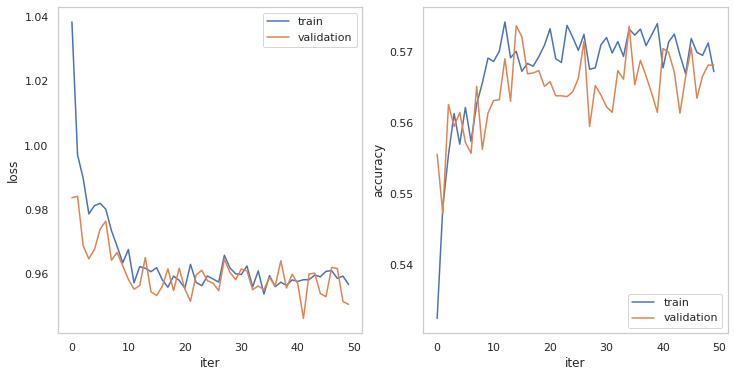

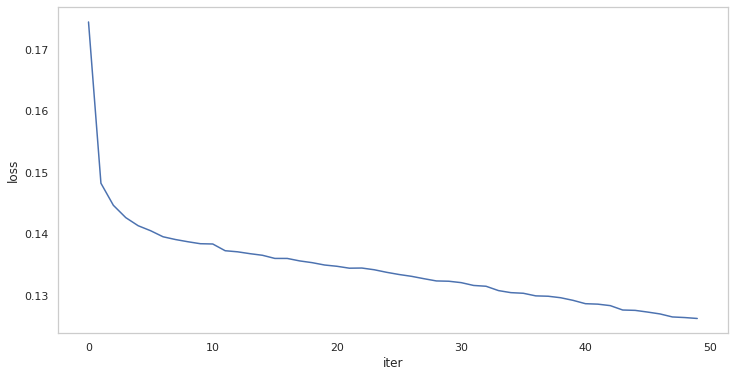

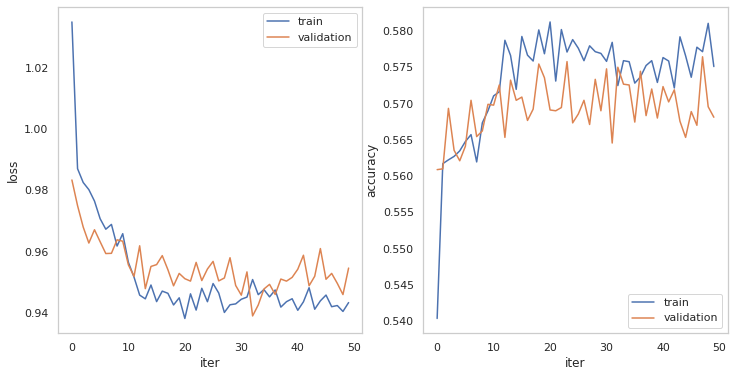

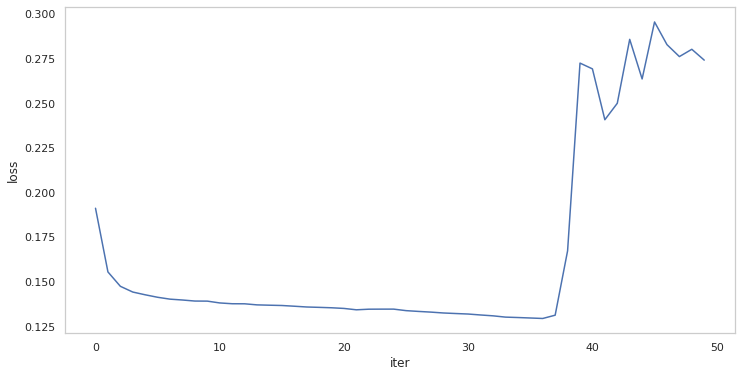

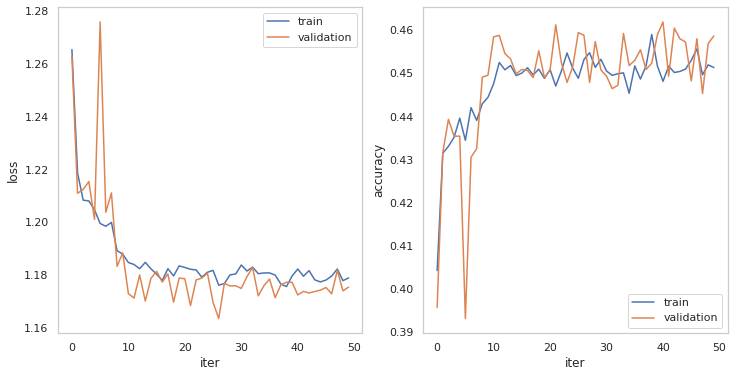

In [26]:
arch = 'GRU'

dims = [32, 64, 128, 256, 512, 1024, 2048]
accs = []

for EMBEDDING_DIM in tqdm(dims):
    print(EMBEDDING_DIM)
    LR = 0.002
    
    # train decoder
    
    encoder = Encoder(
        numerical_input_dim=num_input_dim,
        cat_vocab_sizes=cat_vocab_sizes,
        cat_embedding_dim=cat_embedding_dim,
        embedding_dim=EMBEDDING_DIM,
    )
    encoder.to(device);
    encoder.train()
    optimizer = optim.Adam(encoder.parameters(), lr=LR)
    
    distance = distances.CosineSimilarity()
    reducer = reducers.ThresholdReducer(low = 0) # basically, returns average
    loss_func = losses.TripletMarginLoss(margin = 0.4, distance = distance, reducer = reducer)
    mining_func = miners.TripletMarginMiner(margin = 0.4, distance = distance, type_of_triplets = "semihard")
    
    train_losses = train_ml_model(
        encoder, NUM_EPOCHS, dataloader, NUM_OF_SUBSEQUENCES,
        mining_func, loss_func, optimizer)
    fig, axs = plt.subplots(figsize=(12, 6))

    plt.plot(train_losses, label='train')
    plt.xlabel('iter')
    plt.ylabel('loss');
    plt.savefig(f'plots/ML_{arch}_{EMBEDDING_DIM}_{NUM_OBS}_{NUM_EPOCHS}.png')
    
    SCHEDULER_EPOCHS = 2
    LR = 0.002
    
    # train classifier decoder
    
    classifier = Classifier(
        numerical_input_dim=num_input_dim,
        cat_vocab_sizes=cat_vocab_sizes,
        cat_embedding_dim=cat_embedding_dim,
        embedding_dim=EMBEDDING_DIM
    )
    classifier.encoder = encoder
    classifier.freeze_encoder()
    classifier.to(device);
    
    optimizer = optim.Adam(classifier.decoder.parameters(), lr=LR)
    criterion = nn.CrossEntropyLoss()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        patience=SCHEDULER_EPOCHS,
    )
    
    train_losses, train_accuracy, val_losses, val_accuracy = train_classifier(
        classifier, NUM_EPOCHS, trainloader, testloader,
        optimizer, criterion, scheduler,
        enable_train_mode = lambda: classifier.decoder.train(),
        enable_test_mode = lambda: classifier.decoder.eval(),
    )
    
    fig, axs = plt.subplots(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='train')
    plt.plot(val_losses, label='validation')
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('iter')
    plt.ylabel('accuracy');
    plt.plot(train_accuracy, label='train')
    plt.plot(val_accuracy, label='validation')
    plt.legend()

    plt.savefig(f'plots/clfdec_{arch}_{EMBEDDING_DIM}_{NUM_OBS}_{NUM_EPOCHS}.png')
    
    accs.append(val_accuracy[-1])

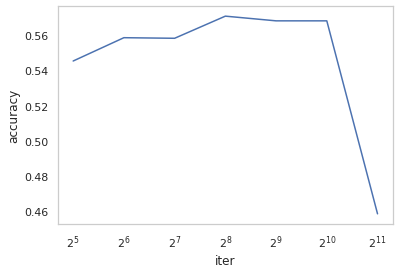

In [34]:
plt.plot(dims, accs)
plt.xlabel('iter')
plt.xscale('log', base=2)
plt.xticks(dims)
plt.ylabel('accuracy');
plt.savefig(f'plots/clfdec_{arch}_embedding_to_acc_{NUM_OBS}_{NUM_EPOCHS}.png')

In [27]:
accs

[0.5453333258628845,
 0.558555543422699,
 0.558222234249115,
 0.5707777738571167,
 0.5681111216545105,
 0.5681111216545105,
 0.45866668224334717]

In [35]:
dims

[32, 64, 128, 256, 512, 1024, 2048]